<a href="https://colab.research.google.com/github/ShoroukKaram/Diabetes_Prediction_With_Neural_Network/blob/main/Diabetes_Prediction_With_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style = "font-size : 40px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #B0E0E6 ; border-radius: 15px 15px;"><strong>Diabet Prediction With Neural Network</strong></p>

In [2]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3692c9a0662562242e09f4840312cef087a20ab421663e3c4a8b45cdbe1c285b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [4]:
!pip install --upgrade typing-extensions pandas-profiling


In [7]:
!pip uninstall pandas-profiling
!pip install pandas-profiling


Found existing installation: pandas-profiling 3.6.6
Uninstalling pandas-profiling-3.6.6:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.10/dist-packages/pandas_profiling-3.6.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas_profiling/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-profiling-3.6.6
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)


In [9]:
# Base Libraries
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
from tensorflow.keras.utils import plot_model

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Algorithms
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint


In [10]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
np.unique(df['Outcome'],return_counts=True)

(array([0, 1]), array([500, 268]))

<a id="eda"></a>
# <p style="background-color:#B0E0E6; font-family:calibri ; color:#393e46; font-size: 150%; text-align:center; border-radius: 50px 15px;">EDA</p>


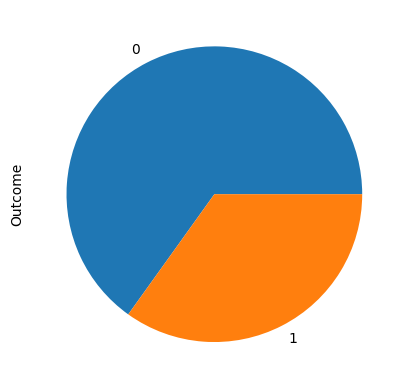

In [15]:
df['Outcome'].value_counts().plot(kind='pie');

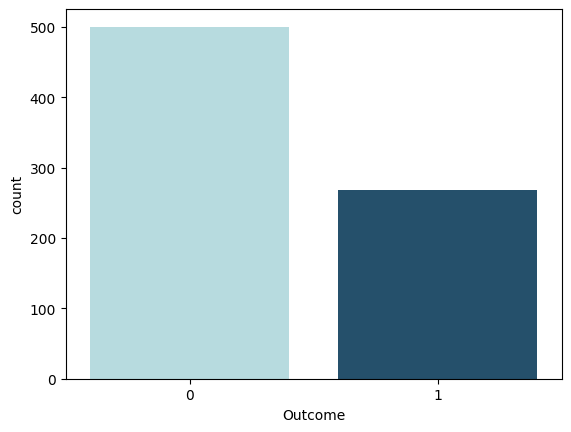

In [16]:
palette = [ '#B0E0E6', '#1A5276']
sns.countplot(data = df , x='Outcome' , palette=palette);

<a id="split"></a>
# <p style="background-color:#B0E0E6; font-family:calibri ; color:#393e46; font-size: 150%; text-align:center; border-radius: 50px 15px;">Preprocess & Split Dataset</p>



In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [18]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
np.shape(X)

(768, 8)

In [21]:
y = pd.get_dummies(y)

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=142)

Model


In [23]:
def create_neural_network(num_layers, num_neurons_per_layer):
    model = Sequential()
    model.add(Dense(num_neurons_per_layer[0], input_shape= (8,), activation='relu'))
    for i in range(1, num_layers):
        model.add(Dense(num_neurons_per_layer[i], activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

In [24]:
batch_sizes = [1 , 18]
best_val_accuracy = []
training_histories = []

for num_layers in range(2,9):
    num_neurons_per_layer = np.random.randint(5, 30 , size=num_layers)
    for num_neurons in num_neurons_per_layer:
        for batch_size in batch_sizes:

            #Create model
            model = create_neural_network(num_layers, num_neurons_per_layer)

            #Compile model
            optimizer = Adam(learning_rate=0.001)
            loss_function = CategoricalCrossentropy()
            metrics = [tf.keras.metrics.CategoricalAccuracy(),
            tf.keras.metrics.Recall(name='recall_1',class_id=1)]

            model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

            #Callback for save best model
            model_checkpoint = ModelCheckpoint(f"best_model_{num_layers}HL_{', '.join(map(str, num_neurons_per_layer))}N_in_layer_batchsize={batch_size}.h5", save_best_only=True, monitor="val_categorical_accuracy", mode="max", verbose=1)


            #Train model
            history = model.fit(X_train, y_train,
                      epochs=50,
                      validation_data=(X_test, y_test),
                      batch_size= batch_size,
                      workers=2,
                      callbacks=[model_checkpoint])

            # After training, append the history to the list
            training_histories.append(history)

            #evaluation
            best_val_accuracy.append(max(history.history['val_categorical_accuracy']))
            print(f"\nModel with {num_layers} hidden layers & {num_neurons_per_layer} neurons in each layer & batch size={batch_size} :")
            print("best val categorical accuracy  = ", best_val_accuracy[-1])
            print('\n\n')




Epoch 1/50
566/576 [============================>.] - ETA: 0s - loss: 0.6540 - categorical_accuracy: 0.6466 - recall_1: 0.5487
Epoch 1: val_categorical_accuracy improved from -inf to 0.82292, saving model to best_model_2HL_22, 11N_in_layer_batchsize=1.h5
576/576 [==============================] - 3s 3ms/step - loss: 0.6527 - categorical_accuracy: 0.6458 - recall_1: 0.5477 - val_loss: 0.4676 - val_categorical_accuracy: 0.8229 - val_recall_1: 0.6232
Epoch 2/50
 84/576 [===>..........................] - ETA: 0s - loss: 0.4550 - categorical_accuracy: 0.7976 - recall_1: 0.5200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


558/576 [============================>.] - ETA: 0s - loss: 0.5034 - categorical_accuracy: 0.7509 - recall_1: 0.5156
Epoch 2: val_categorical_accuracy improved from 0.82292 to 0.82812, saving model to best_model_2HL_22, 11N_in_layer_batchsize=1.h5
576/576 [==============================] - 1s 2ms/step - loss: 0.5147 - categorical_accuracy: 0.7465 - recall_1: 0.5075 - val_loss: 0.4193 - val_categorical_accuracy: 0.8281 - val_recall_1: 0.6087
Epoch 3/50
558/576 [============================>.] - ETA: 0s - loss: 0.4988 - categorical_accuracy: 0.7581 - recall_1: 0.5103
Epoch 3: val_categorical_accuracy improved from 0.82812 to 0.84375, saving model to best_model_2HL_22, 11N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 4ms/step - loss: 0.4959 - categorical_accuracy: 0.7604 - recall_1: 0.5075 - val_loss: 0.3958 - val_categorical_accuracy: 0.8438 - val_recall_1: 0.6957
Epoch 4/50
565/576 [============================>.] - ETA: 0s - loss: 0.4923 - categorical_accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/32 [==================>...........] - ETA: 0s - loss: 0.5175 - categorical_accuracy: 0.7328 - recall_1: 0.4361
Epoch 3: val_categorical_accuracy improved from 0.73438 to 0.76042, saving model to best_model_2HL_22, 11N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.5219 - categorical_accuracy: 0.7292 - recall_1: 0.4271 - val_loss: 0.4857 - val_categorical_accuracy: 0.7604 - val_recall_1: 0.4928
Epoch 4/50
24/32 [=====================>........] - ETA: 0s - loss: 0.5286 - categorical_accuracy: 0.7106 - recall_1: 0.4194
Epoch 4: val_categorical_accuracy improved from 0.76042 to 0.78125, saving model to best_model_2HL_22, 11N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 4ms/step - loss: 0.5083 - categorical_accuracy: 0.7309 - recall_1: 0.4623 - val_loss: 0.4688 - val_categorical_accuracy: 0.7812 - val_recall_1: 0.5797
Epoch 5/50
25/32 [======================>.......] - ETA: 0s - loss: 0.4893 - categorical_accuracy: 0.7400 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


556/576 [===========================>..] - ETA: 0s - loss: 0.5061 - categorical_accuracy: 0.7392 - recall_1: 0.5288
Epoch 2: val_categorical_accuracy improved from 0.80729 to 0.84375, saving model to best_model_2HL_22, 11N_in_layer_batchsize=1.h5
576/576 [==============================] - 1s 2ms/step - loss: 0.5076 - categorical_accuracy: 0.7344 - recall_1: 0.5126 - val_loss: 0.4025 - val_categorical_accuracy: 0.8438 - val_recall_1: 0.7101
Epoch 3/50
565/576 [============================>.] - ETA: 0s - loss: 0.4844 - categorical_accuracy: 0.7504 - recall_1: 0.5385
Epoch 3: val_categorical_accuracy did not improve from 0.84375
576/576 [==============================] - 1s 2ms/step - loss: 0.4868 - categorical_accuracy: 0.7500 - recall_1: 0.5377 - val_loss: 0.3951 - val_categorical_accuracy: 0.8281 - val_recall_1: 0.7681
Epoch 4/50
565/576 [============================>.] - ETA: 0s - loss: 0.4724 - categorical_accuracy: 0.7611 - recall_1: 0.5714
Epoch 4: val_categorical_accuracy did not 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy improved from 0.68229 to 0.77083, saving model to best_model_2HL_22, 11N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 7ms/step - loss: 0.6327 - categorical_accuracy: 0.6736 - recall_1: 0.4271 - val_loss: 0.5688 - val_categorical_accuracy: 0.7708 - val_recall_1: 0.5362
Epoch 3/50
17/32 [==============>...............] - ETA: 0s - loss: 0.5861 - categorical_accuracy: 0.7157 - recall_1: 0.3810
Epoch 3: val_categorical_accuracy did not improve from 0.77083
32/32 [==============================] - 0s 5ms/step - loss: 0.5796 - categorical_accuracy: 0.7188 - recall_1: 0.4020 - val_loss: 0.5315 - val_categorical_accuracy: 0.7604 - val_recall_1: 0.5072
Epoch 4/50
18/32 [===============>..............] - ETA: 0s - loss: 0.5562 - categorical_accuracy: 0.7222 - recall_1: 0.3661
Epoch 4: val_categorical_accuracy improved from 0.77083 to 0.79167, saving model to best_model_2HL_22, 11N_in_layer_batchsize=18.h5
32/32 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


568/576 [============================>.] - ETA: 0s - loss: 0.5156 - categorical_accuracy: 0.7465 - recall_1: 0.5556
Epoch 2: val_categorical_accuracy improved from 0.79167 to 0.80208, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 4ms/step - loss: 0.5137 - categorical_accuracy: 0.7483 - recall_1: 0.5528 - val_loss: 0.4323 - val_categorical_accuracy: 0.8021 - val_recall_1: 0.6377
Epoch 3/50
559/576 [============================>.] - ETA: 0s - loss: 0.4964 - categorical_accuracy: 0.7513 - recall_1: 0.5510
Epoch 3: val_categorical_accuracy did not improve from 0.80208
576/576 [==============================] - 2s 4ms/step - loss: 0.4988 - categorical_accuracy: 0.7500 - recall_1: 0.5477 - val_loss: 0.4147 - val_categorical_accuracy: 0.7969 - val_recall_1: 0.7101
Epoch 4/50
558/576 [============================>.] - ETA: 0s - loss: 0.4838 - categorical_accuracy: 0.7581 - recall_1: 0.5864
Epoch 4: val_categorical_accuracy impro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/32 [===================>..........] - ETA: 0s - loss: 0.6213 - categorical_accuracy: 0.6793 - recall_1: 0.1654
Epoch 3: val_categorical_accuracy improved from 0.64583 to 0.69271, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.6246 - categorical_accuracy: 0.6632 - recall_1: 0.1457 - val_loss: 0.5989 - val_categorical_accuracy: 0.6927 - val_recall_1: 0.1884
Epoch 4/50
25/32 [======================>.......] - ETA: 0s - loss: 0.5869 - categorical_accuracy: 0.6867 - recall_1: 0.1859
Epoch 4: val_categorical_accuracy improved from 0.69271 to 0.70833, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 4ms/step - loss: 0.5861 - categorical_accuracy: 0.6840 - recall_1: 0.1759 - val_loss: 0.5516 - val_categorical_accuracy: 0.7083 - val_recall_1: 0.2464
Epoch 5/50
26/32 [=======================>......] - ETA: 0s - loss: 0.5661 - categorical_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


565/576 [============================>.] - ETA: 0s - loss: 0.5250 - categorical_accuracy: 0.7504 - recall_1: 0.4691
Epoch 2: val_categorical_accuracy improved from 0.74479 to 0.81250, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=1.h5
576/576 [==============================] - 1s 2ms/step - loss: 0.5283 - categorical_accuracy: 0.7465 - recall_1: 0.4623 - val_loss: 0.4617 - val_categorical_accuracy: 0.8125 - val_recall_1: 0.6812
Epoch 3/50
573/576 [============================>.] - ETA: 0s - loss: 0.4940 - categorical_accuracy: 0.7609 - recall_1: 0.5303
Epoch 3: val_categorical_accuracy did not improve from 0.81250
576/576 [==============================] - 1s 2ms/step - loss: 0.4940 - categorical_accuracy: 0.7604 - recall_1: 0.5276 - val_loss: 0.4639 - val_categorical_accuracy: 0.7708 - val_recall_1: 0.4638
Epoch 4/50
554/576 [===========================>..] - ETA: 0s - loss: 0.4938 - categorical_accuracy: 0.7509 - recall_1: 0.5385
Epoch 4: val_categorical_accuracy did n

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/32 [==================>...........] - ETA: 0s - loss: 0.5975 - categorical_accuracy: 0.6878 - recall_1: 0.1955
Epoch 3: val_categorical_accuracy improved from 0.71354 to 0.77083, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.5915 - categorical_accuracy: 0.6979 - recall_1: 0.2111 - val_loss: 0.5348 - val_categorical_accuracy: 0.7708 - val_recall_1: 0.4348
Epoch 4/50
24/32 [=====================>........] - ETA: 0s - loss: 0.5553 - categorical_accuracy: 0.7338 - recall_1: 0.3766
Epoch 4: val_categorical_accuracy improved from 0.77083 to 0.82812, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.5457 - categorical_accuracy: 0.7309 - recall_1: 0.3719 - val_loss: 0.4731 - val_categorical_accuracy: 0.8281 - val_recall_1: 0.6377
Epoch 5/50
24/32 [=====================>........] - ETA: 0s - loss: 0.5249 - categorical_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


571/576 [============================>.] - ETA: 0s - loss: 0.5112 - categorical_accuracy: 0.7443 - recall_1: 0.4796
Epoch 2: val_categorical_accuracy improved from 0.78125 to 0.83854, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=1.h5
576/576 [==============================] - 1s 3ms/step - loss: 0.5172 - categorical_accuracy: 0.7413 - recall_1: 0.4774 - val_loss: 0.4136 - val_categorical_accuracy: 0.8385 - val_recall_1: 0.7826
Epoch 3/50
552/576 [===========================>..] - ETA: 0s - loss: 0.4997 - categorical_accuracy: 0.7391 - recall_1: 0.5544
Epoch 3: val_categorical_accuracy did not improve from 0.83854
576/576 [==============================] - 2s 3ms/step - loss: 0.4962 - categorical_accuracy: 0.7413 - recall_1: 0.5477 - val_loss: 0.4012 - val_categorical_accuracy: 0.8333 - val_recall_1: 0.7536
Epoch 4/50
571/576 [============================>.] - ETA: 0s - loss: 0.4932 - categorical_accuracy: 0.7513 - recall_1: 0.5482
Epoch 4: val_categorical_accuracy did n

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/32 [=================>............] - ETA: 0s - loss: 0.6252 - categorical_accuracy: 0.7361 - recall_1: 0.4400
Epoch 3: val_categorical_accuracy did not improve from 0.76042
32/32 [==============================] - 0s 4ms/step - loss: 0.6218 - categorical_accuracy: 0.7257 - recall_1: 0.3920 - val_loss: 0.5872 - val_categorical_accuracy: 0.7604 - val_recall_1: 0.4638
Epoch 4/50
26/32 [=======================>......] - ETA: 0s - loss: 0.5864 - categorical_accuracy: 0.7308 - recall_1: 0.3789
Epoch 4: val_categorical_accuracy improved from 0.76042 to 0.78646, saving model to best_model_3HL_16, 8, 17N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 6ms/step - loss: 0.5838 - categorical_accuracy: 0.7309 - recall_1: 0.3769 - val_loss: 0.5340 - val_categorical_accuracy: 0.7865 - val_recall_1: 0.5072
Epoch 5/50
23/32 [====================>.........] - ETA: 0s - loss: 0.5567 - categorical_accuracy: 0.7295 - recall_1: 0.3655
Epoch 5: val_categorical_accuracy improved from 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


560/576 [============================>.] - ETA: 0s - loss: 0.5457 - categorical_accuracy: 0.7232 - recall_1: 0.4308
Epoch 2: val_categorical_accuracy improved from 0.76042 to 0.79167, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5438 - categorical_accuracy: 0.7240 - recall_1: 0.4271 - val_loss: 0.4747 - val_categorical_accuracy: 0.7917 - val_recall_1: 0.6667
Epoch 3/50
571/576 [============================>.] - ETA: 0s - loss: 0.5234 - categorical_accuracy: 0.7303 - recall_1: 0.5327
Epoch 3: val_categorical_accuracy improved from 0.79167 to 0.81771, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5200 - categorical_accuracy: 0.7326 - recall_1: 0.5327 - val_loss: 0.4553 - val_categorical_accuracy: 0.8177 - val_recall_1: 0.7246
Epoch 4/50
576/576 [==============================] - ETA: 0s - loss: 0.5111 - categorica

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/32 [================>.............] - ETA: 0s - loss: 0.6416 - categorical_accuracy: 0.6784 - recall_1: 0.1525    
Epoch 3: val_categorical_accuracy did not improve from 0.70833
32/32 [==============================] - 0s 4ms/step - loss: 0.6342 - categorical_accuracy: 0.6771 - recall_1: 0.1457 - val_loss: 0.6083 - val_categorical_accuracy: 0.7031 - val_recall_1: 0.2174
Epoch 4/50
24/32 [=====================>........] - ETA: 0s - loss: 0.6057 - categorical_accuracy: 0.6944 - recall_1: 0.2123
Epoch 4: val_categorical_accuracy improved from 0.70833 to 0.71875, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.6080 - categorical_accuracy: 0.6875 - recall_1: 0.2161 - val_loss: 0.5702 - val_categorical_accuracy: 0.7188 - val_recall_1: 0.2899
Epoch 5/50
20/32 [=================>............] - ETA: 0s - loss: 0.5821 - categorical_accuracy: 0.7000 - recall_1: 0.2645
Epoch 5: val_categorical_accuracy improve

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


568/576 [============================>.] - ETA: 0s - loss: 0.5956 - categorical_accuracy: 0.7042 - recall_1: 0.2806
Epoch 2: val_categorical_accuracy improved from 0.65104 to 0.75000, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5982 - categorical_accuracy: 0.7031 - recall_1: 0.2764 - val_loss: 0.5185 - val_categorical_accuracy: 0.7500 - val_recall_1: 0.3913
Epoch 3/50
557/576 [============================>.] - ETA: 0s - loss: 0.5559 - categorical_accuracy: 0.7217 - recall_1: 0.4359
Epoch 3: val_categorical_accuracy improved from 0.75000 to 0.81771, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5522 - categorical_accuracy: 0.7274 - recall_1: 0.4372 - val_loss: 0.4347 - val_categorical_accuracy: 0.8177 - val_recall_1: 0.7391
Epoch 4/50
571/576 [============================>.] - ETA: 0s - loss: 0.5260 - categorica

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy did not improve from 0.64062
32/32 [==============================] - 0s 6ms/step - loss: 0.6463 - categorical_accuracy: 0.6545 - recall_1: 0.0000e+00 - val_loss: 0.6557 - val_categorical_accuracy: 0.6406 - val_recall_1: 0.0000e+00
Epoch 3/50
20/32 [=================>............] - ETA: 0s - loss: 0.6390 - categorical_accuracy: 0.6472 - recall_1: 0.0000e+00
Epoch 3: val_categorical_accuracy did not improve from 0.64062
32/32 [==============================] - 0s 4ms/step - loss: 0.6278 - categorical_accuracy: 0.6545 - recall_1: 0.0000e+00 - val_loss: 0.6291 - val_categorical_accuracy: 0.6406 - val_recall_1: 0.0000e+00
Epoch 4/50
22/32 [===================>..........] - ETA: 0s - loss: 0.6143 - categorical_accuracy: 0.6338 - recall_1: 0.0000e+00
Epoch 4: val_categorical_accuracy did not improve from 0.64062
32/32 [==============================] - 0s 4ms/step - loss: 0.6123 - categorical_accuracy: 0.6545 - recall_1: 0.0000e+00 - val_loss: 0.5992 - val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


557/576 [============================>.] - ETA: 0s - loss: 0.5188 - categorical_accuracy: 0.7271 - recall_1: 0.6545
Epoch 2: val_categorical_accuracy improved from 0.76042 to 0.78646, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5263 - categorical_accuracy: 0.7274 - recall_1: 0.6583 - val_loss: 0.4630 - val_categorical_accuracy: 0.7865 - val_recall_1: 0.7536
Epoch 3/50
572/576 [============================>.] - ETA: 0s - loss: 0.5131 - categorical_accuracy: 0.7430 - recall_1: 0.6939
Epoch 3: val_categorical_accuracy improved from 0.78646 to 0.80729, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5132 - categorical_accuracy: 0.7413 - recall_1: 0.6884 - val_loss: 0.4519 - val_categorical_accuracy: 0.8073 - val_recall_1: 0.6957
Epoch 4/50
574/576 [============================>.] - ETA: 0s - loss: 0.5040 - categorica

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy improved from 0.62500 to 0.66146, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 7ms/step - loss: 0.6637 - categorical_accuracy: 0.6632 - recall_1: 0.1608 - val_loss: 0.6557 - val_categorical_accuracy: 0.6615 - val_recall_1: 0.1739
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.6390 - categorical_accuracy: 0.6806 - recall_1: 0.1960
Epoch 3: val_categorical_accuracy improved from 0.66146 to 0.69792, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 7ms/step - loss: 0.6390 - categorical_accuracy: 0.6806 - recall_1: 0.1960 - val_loss: 0.6271 - val_categorical_accuracy: 0.6979 - val_recall_1: 0.2464
Epoch 4/50
17/32 [==============>...............] - ETA: 0s - loss: 0.6244 - categorical_accuracy: 0.6830 - recall_1: 0.1759
Epoch 4: val_categorical_accuracy did not improve from 0.69792
32/32 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


555/576 [===========================>..] - ETA: 0s - loss: 0.5610 - categorical_accuracy: 0.6919 - recall_1: 0.2766
Epoch 2: val_categorical_accuracy improved from 0.64062 to 0.79167, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5606 - categorical_accuracy: 0.6910 - recall_1: 0.2864 - val_loss: 0.4881 - val_categorical_accuracy: 0.7917 - val_recall_1: 0.7101
Epoch 3/50
573/576 [============================>.] - ETA: 0s - loss: 0.5238 - categorical_accuracy: 0.7382 - recall_1: 0.5729
Epoch 3: val_categorical_accuracy did not improve from 0.79167
576/576 [==============================] - 2s 4ms/step - loss: 0.5227 - categorical_accuracy: 0.7378 - recall_1: 0.5729 - val_loss: 0.4613 - val_categorical_accuracy: 0.7917 - val_recall_1: 0.6377
Epoch 4/50
571/576 [============================>.] - ETA: 0s - loss: 0.5012 - categorical_accuracy: 0.7566 - recall_1: 0.5455
Epoch 4: val_categorical_accuracy di

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/32 [===============>..............] - ETA: 0s - loss: 0.6417 - categorical_accuracy: 0.6543 - recall_1: 0.0175    
Epoch 3: val_categorical_accuracy did not improve from 0.64062
32/32 [==============================] - 0s 4ms/step - loss: 0.6319 - categorical_accuracy: 0.6580 - recall_1: 0.0101 - val_loss: 0.6254 - val_categorical_accuracy: 0.6406 - val_recall_1: 0.0000e+00
Epoch 4/50
19/32 [================>.............] - ETA: 0s - loss: 0.6179 - categorical_accuracy: 0.6696 - recall_1: 0.0261    
Epoch 4: val_categorical_accuracy improved from 0.64062 to 0.67188, saving model to best_model_4HL_6, 6, 10, 22N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.6072 - categorical_accuracy: 0.6753 - recall_1: 0.0854 - val_loss: 0.5970 - val_categorical_accuracy: 0.6719 - val_recall_1: 0.2319
Epoch 5/50
21/32 [==================>...........] - ETA: 0s - loss: 0.6025 - categorical_accuracy: 0.6825 - recall_1: 0.2183
Epoch 5: val_categorical_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


554/576 [===========================>..] - ETA: 0s - loss: 0.5187 - categorical_accuracy: 0.7455 - recall_1: 0.6042
Epoch 2: val_categorical_accuracy improved from 0.72396 to 0.79688, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5219 - categorical_accuracy: 0.7465 - recall_1: 0.5930 - val_loss: 0.4646 - val_categorical_accuracy: 0.7969 - val_recall_1: 0.5942
Epoch 3/50
563/576 [============================>.] - ETA: 0s - loss: 0.5045 - categorical_accuracy: 0.7442 - recall_1: 0.5751
Epoch 3: val_categorical_accuracy improved from 0.79688 to 0.81771, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5059 - categorical_accuracy: 0.7448 - recall_1: 0.5779 - val_loss: 0.4564 - val_categorical_accuracy: 0.8177 - val_recall_1: 0.7101
Epoch 4/50
574/576 [============================>.] - ETA: 0s - loss: 0.4882 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 5ms/step - loss: 0.6232 - categorical_accuracy: 0.6545 - recall_1: 0.0000e+00 - val_loss: 0.5811 - val_categorical_accuracy: 0.6458 - val_recall_1: 0.0145
Epoch 3/50
15/32 [=============>................] - ETA: 0s - loss: 0.5948 - categorical_accuracy: 0.6370 - recall_1: 0.0101    
Epoch 3: val_categorical_accuracy improved from 0.64583 to 0.79167, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.5740 - categorical_accuracy: 0.6806 - recall_1: 0.1206 - val_loss: 0.5046 - val_categorical_accuracy: 0.7917 - val_recall_1: 0.5217
Epoch 4/50
20/32 [=================>............] - ETA: 0s - loss: 0.5468 - categorical_accuracy: 0.7139 - recall_1: 0.4758
Epoch 4: val_categorical_accuracy improved from 0.79167 to 0.81250, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.535

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


573/576 [============================>.] - ETA: 0s - loss: 0.5282 - categorical_accuracy: 0.7295 - recall_1: 0.5327
Epoch 2: val_categorical_accuracy improved from 0.82292 to 0.82812, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5276 - categorical_accuracy: 0.7309 - recall_1: 0.5327 - val_loss: 0.4263 - val_categorical_accuracy: 0.8281 - val_recall_1: 0.7536
Epoch 3/50
574/576 [============================>.] - ETA: 0s - loss: 0.5008 - categorical_accuracy: 0.7526 - recall_1: 0.5707
Epoch 3: val_categorical_accuracy improved from 0.82812 to 0.83854, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5020 - categorical_accuracy: 0.7517 - recall_1: 0.5678 - val_loss: 0.4285 - val_categorical_accuracy: 0.8385 - val_recall_1: 0.7536
Epoch 4/50
561/576 [============================>.] - ETA: 0s - loss: 0.4868 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy improved from 0.65104 to 0.66146, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 9ms/step - loss: 0.6382 - categorical_accuracy: 0.6562 - recall_1: 0.0151 - val_loss: 0.6008 - val_categorical_accuracy: 0.6615 - val_recall_1: 0.0870
Epoch 3/50
27/32 [========================>.....] - ETA: 0s - loss: 0.5846 - categorical_accuracy: 0.6749 - recall_1: 0.1754
Epoch 3: val_categorical_accuracy improved from 0.66146 to 0.72917, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 9ms/step - loss: 0.5724 - categorical_accuracy: 0.6875 - recall_1: 0.1960 - val_loss: 0.5163 - val_categorical_accuracy: 0.7292 - val_recall_1: 0.4058
Epoch 4/50
29/32 [==========================>...] - ETA: 0s - loss: 0.5252 - categorical_accuracy: 0.7395 - recall_1: 0.4703
Epoch 4: val_categorical_accuracy improved from 0.72917 to 0.79167, savin

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


569/576 [============================>.] - ETA: 0s - loss: 0.5188 - categorical_accuracy: 0.7293 - recall_1: 0.5487
Epoch 2: val_categorical_accuracy did not improve from 0.81250
576/576 [==============================] - 3s 5ms/step - loss: 0.5180 - categorical_accuracy: 0.7292 - recall_1: 0.5477 - val_loss: 0.4457 - val_categorical_accuracy: 0.7969 - val_recall_1: 0.7681
Epoch 3/50
567/576 [============================>.] - ETA: 0s - loss: 0.5101 - categorical_accuracy: 0.7478 - recall_1: 0.6061
Epoch 3: val_categorical_accuracy did not improve from 0.81250
576/576 [==============================] - 2s 4ms/step - loss: 0.5065 - categorical_accuracy: 0.7500 - recall_1: 0.6080 - val_loss: 0.4343 - val_categorical_accuracy: 0.7969 - val_recall_1: 0.5072
Epoch 4/50
568/576 [============================>.] - ETA: 0s - loss: 0.4878 - categorical_accuracy: 0.7377 - recall_1: 0.5206
Epoch 4: val_categorical_accuracy did not improve from 0.81250
576/576 [==============================] - 3s 5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_categorical_accuracy improved from 0.67708 to 0.70833, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 9ms/step - loss: 0.5982 - categorical_accuracy: 0.6910 - recall_1: 0.1809 - val_loss: 0.5540 - val_categorical_accuracy: 0.7083 - val_recall_1: 0.3913
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.5583 - categorical_accuracy: 0.7135 - recall_1: 0.3568
Epoch 3: val_categorical_accuracy improved from 0.70833 to 0.75000, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 7ms/step - loss: 0.5583 - categorical_accuracy: 0.7135 - recall_1: 0.3568 - val_loss: 0.5130 - val_categorical_accuracy: 0.7500 - val_recall_1: 0.5362
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.5402 - categorical_accuracy: 0.7257 - recall_1: 0.4020
Epoch 4: val_categorical_accuracy improved from 0.75000 to 0.76042, savin

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


574/576 [============================>.] - ETA: 0s - loss: 0.5241 - categorical_accuracy: 0.7334 - recall_1: 0.5829
Epoch 2: val_categorical_accuracy improved from 0.78125 to 0.80208, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 4ms/step - loss: 0.5239 - categorical_accuracy: 0.7344 - recall_1: 0.5829 - val_loss: 0.4566 - val_categorical_accuracy: 0.8021 - val_recall_1: 0.7971
Epoch 3/50
565/576 [============================>.] - ETA: 0s - loss: 0.4933 - categorical_accuracy: 0.7575 - recall_1: 0.6359
Epoch 3: val_categorical_accuracy improved from 0.80208 to 0.80729, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 4ms/step - loss: 0.4991 - categorical_accuracy: 0.7552 - recall_1: 0.6281 - val_loss: 0.4453 - val_categorical_accuracy: 0.8073 - val_recall_1: 0.6522
Epoch 4/50
571/576 [============================>.] - ETA: 0s - loss: 0.4906 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 6ms/step - loss: 0.6155 - categorical_accuracy: 0.6545 - recall_1: 0.0000e+00 - val_loss: 0.5953 - val_categorical_accuracy: 0.6510 - val_recall_1: 0.0290
Epoch 3/50
18/32 [===============>..............] - ETA: 0s - loss: 0.6012 - categorical_accuracy: 0.6389 - recall_1: 0.0331    
Epoch 3: val_categorical_accuracy improved from 0.65104 to 0.66667, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0.5719 - categorical_accuracy: 0.6701 - recall_1: 0.0603 - val_loss: 0.5352 - val_categorical_accuracy: 0.6667 - val_recall_1: 0.0870
Epoch 4/50
19/32 [================>.............] - ETA: 0s - loss: 0.5382 - categorical_accuracy: 0.7018 - recall_1: 0.1491    
Epoch 4: val_categorical_accuracy improved from 0.66667 to 0.67708, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=18.h5
32/32 [==============================] - 0s 5ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


574/576 [============================>.] - ETA: 0s - loss: 0.5385 - categorical_accuracy: 0.7334 - recall_1: 0.5528
Epoch 2: val_categorical_accuracy did not improve from 0.84375
576/576 [==============================] - 2s 3ms/step - loss: 0.5382 - categorical_accuracy: 0.7326 - recall_1: 0.5528 - val_loss: 0.4480 - val_categorical_accuracy: 0.8385 - val_recall_1: 0.7101
Epoch 3/50
570/576 [============================>.] - ETA: 0s - loss: 0.5049 - categorical_accuracy: 0.7456 - recall_1: 0.5556
Epoch 3: val_categorical_accuracy improved from 0.84375 to 0.84896, saving model to best_model_5HL_17, 5, 20, 24, 28N_in_layer_batchsize=1.h5
576/576 [==============================] - 2s 3ms/step - loss: 0.5014 - categorical_accuracy: 0.7483 - recall_1: 0.5578 - val_loss: 0.4034 - val_categorical_accuracy: 0.8490 - val_recall_1: 0.7391
Epoch 4/50
565/576 [============================>.] - ETA: 0s - loss: 0.4930 - categorical_accuracy: 0.7558 - recall_1: 0.5677
Epoch 4: val_categorical_accura

KeyboardInterrupt: ignored

<a id="evaluate"></a>
# <p style="background-color:#B0E0E6; font-family:calibri ; color:#393e46; font-size: 150%; text-align:center; border-radius: 50px 15px;">Evaluation</p>


In [25]:
# Find the maximum validation accuracy from the list of histories
best_val_accuracy = max([max(history.history['val_categorical_accuracy']) for history in training_histories])

print("best_val_categorical_accuracy:", best_val_accuracy)

# Find the index of the best accuracy in the list of histories
best_val_accuracy_index = [max(history.history['val_categorical_accuracy']) for history in training_histories].index(best_val_accuracy)

# Access the best model from the list of models
best_model = training_histories[best_val_accuracy_index].model


best_val_categorical_accuracy: 0.8697916865348816


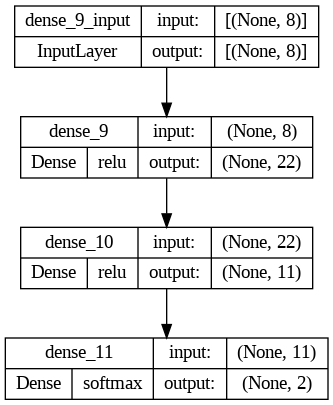

In [26]:
plot_model(best_model, show_layer_activations = True , show_shapes = True)

In [27]:
accuracy = best_model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4015 - categorical_accuracy: 0.8333 - recall_1: 0.7391


In [28]:
training_histories[best_val_accuracy_index].history.keys()

dict_keys(['loss', 'categorical_accuracy', 'recall_1', 'val_loss', 'val_categorical_accuracy', 'val_recall_1'])

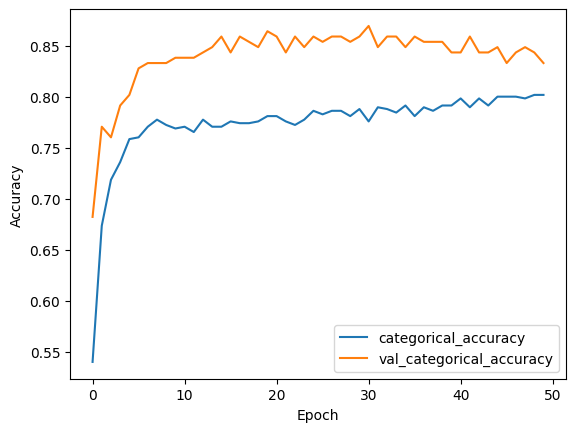

In [29]:
history = training_histories[best_val_accuracy_index]
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['categorical_accuracy','val_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

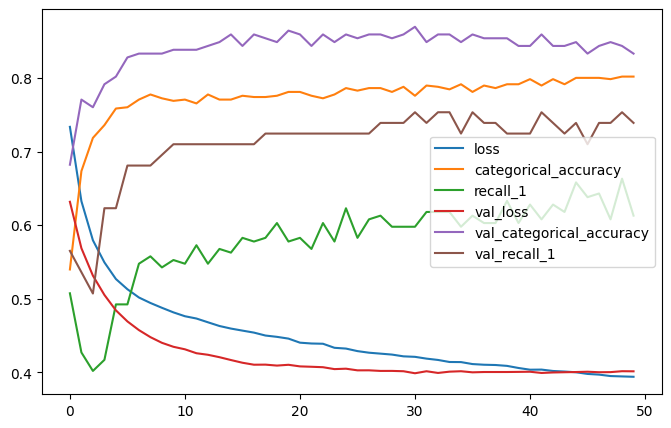

In [30]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5));